In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [101]:
data = pd.read_pickle("./clean_data.pickle")

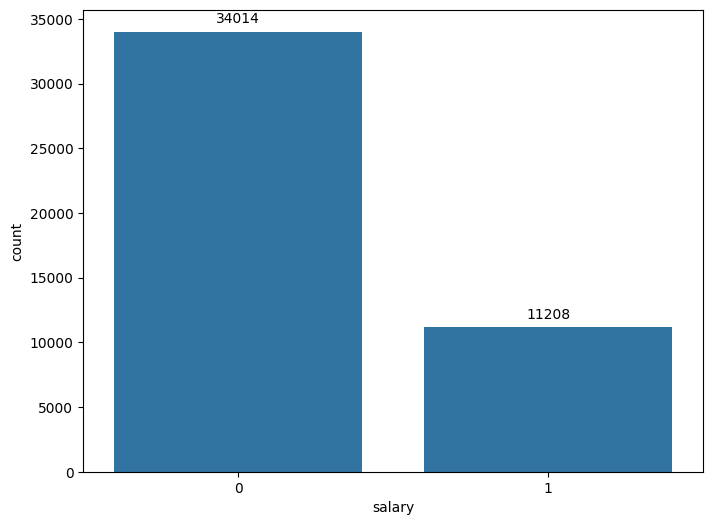

In [102]:
data['salary'] = data['salary'].astype(int)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='salary', data=data)

# Agregar los números encima de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

In [103]:
x = data.iloc[:, 0:14] 
y= data["salary"]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.45, random_state=1,stratify=y)

In [105]:
print('Numero de muestras en y:', np.bincount(y))
print('Numero de muestras en y_train:', np.bincount(y_train))
print('Numero de muestras en y_test:', np.bincount(y_test))

Numero de muestras en y: [34014 11208]
Numero de muestras en y_train: [18708  6164]
Numero de muestras en y_test: [15306  5044]


In [106]:
arbol=DecisionTreeClassifier(criterion='entropy',max_depth=8)
arbol.fit(x_train,y_train)
y_pred = arbol.predict(x_test)

In [107]:
# Evalaucion del modelo
print('Train Accuracy : %.5f' % arbol.score(x_train, y_train))
print('Test Accuracy : %.5f' % arbol.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Train Accuracy : 0.84336
Test Accuracy : 0.83474
Precisión del modelo: 0.8347420147420147


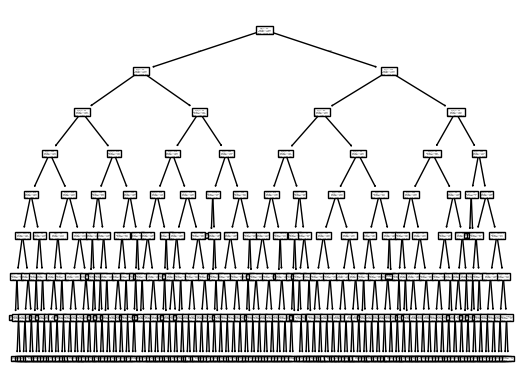

In [108]:
tree.plot_tree(arbol)
plt.show()

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     15306
           1       0.70      0.59      0.64      5044

    accuracy                           0.83     20350
   macro avg       0.78      0.75      0.77     20350
weighted avg       0.83      0.83      0.83     20350



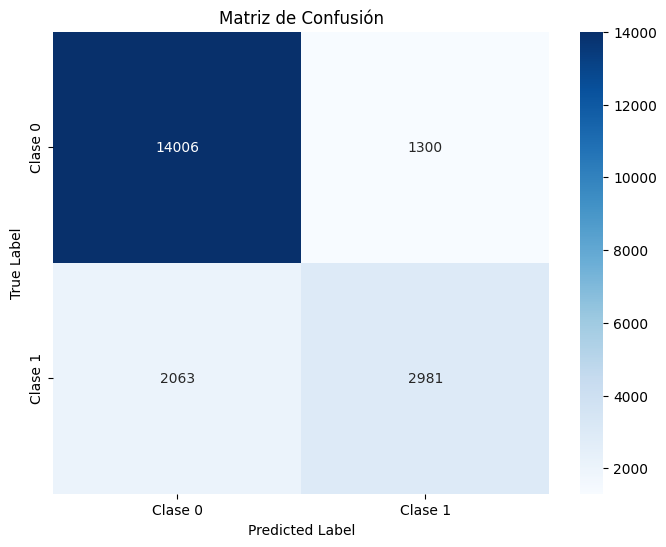

In [110]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()